# AI Assignment 2021
## Bank Marketing Datasets Analysis using KNN Machine Learning Algorithm (With Explanatory Data Analysis)

### Team Name : STRONG!
### Members : 
Muhammad Naufal Hakim [Programmer] 19/440307/TK/48634 <br> Lathif Ma'arif [Editor] 19/444058/TK/49254 <br>Samatha Marhaendra Putra [Programmer & Editor] 19/444071/TK/49267

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
from collections import Counter
import operator

### Load Data

In [ ]:
df = pd.read_csv('bank-additional-full.csv',delimiter=";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank_client = df.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


#### Knowing the categorical variables

In [ ]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [ ]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [ ]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


#### Data Cleaning (if any raw data)

#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

### Explanatory Data Analysis

#### Age Count Distribution

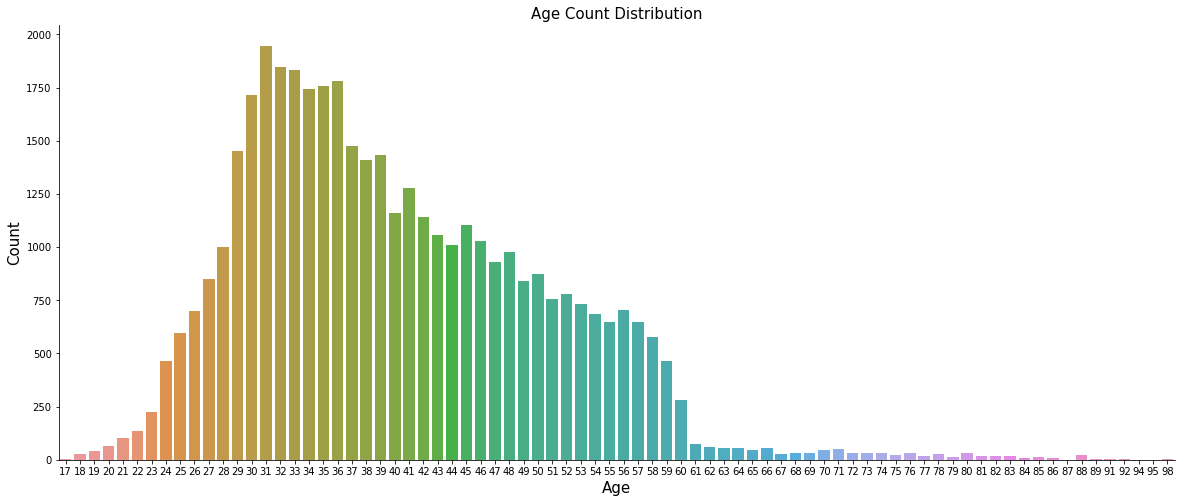

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

#### Age Distribution and Occurence

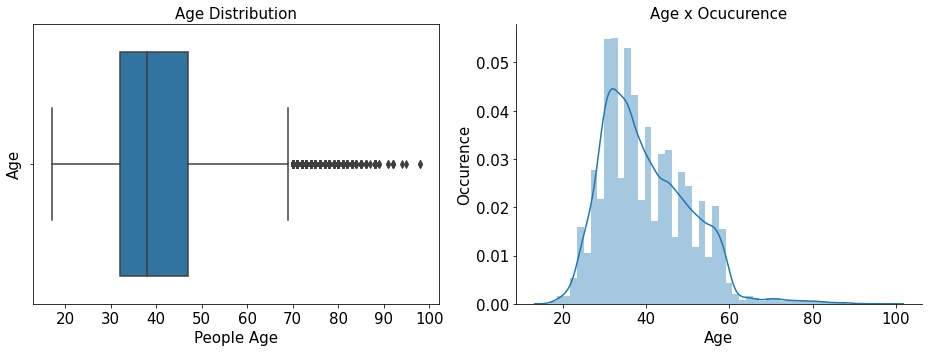

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

#### Age Quartiles

In [ ]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


#### Age Outliers, Mean-STD-CV

In [ ]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


### Age Count Distribution based on jobs

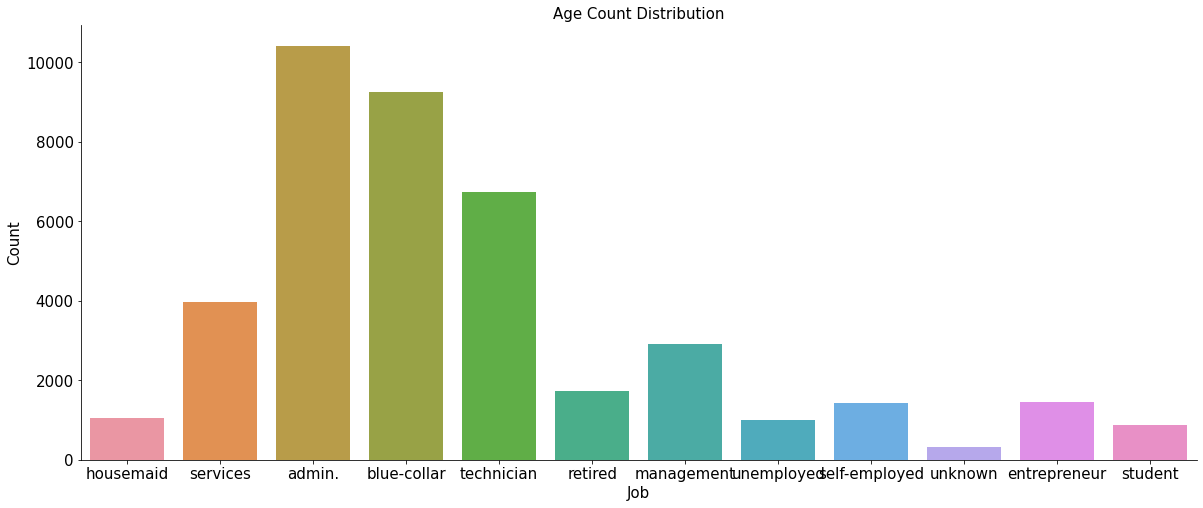

In [ ]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Marital Count Distribution

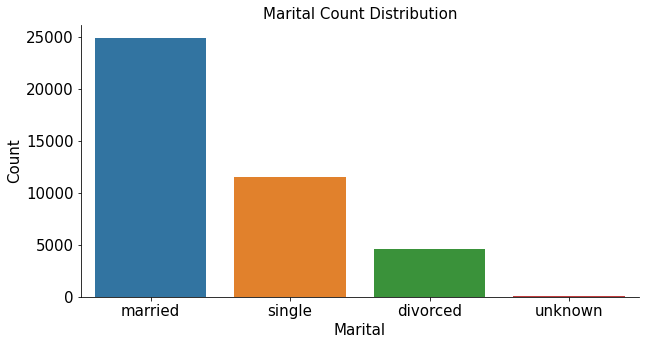

In [ ]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Education Count Distribution

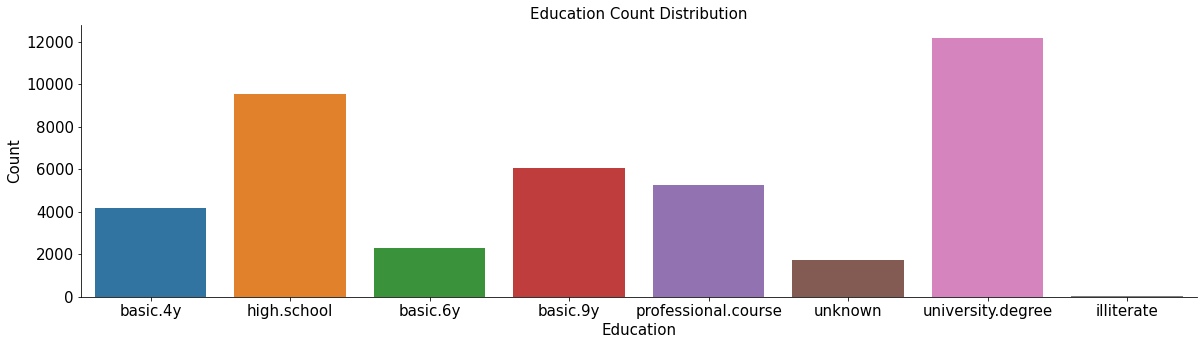

In [ ]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### "Has Loan" Distribution

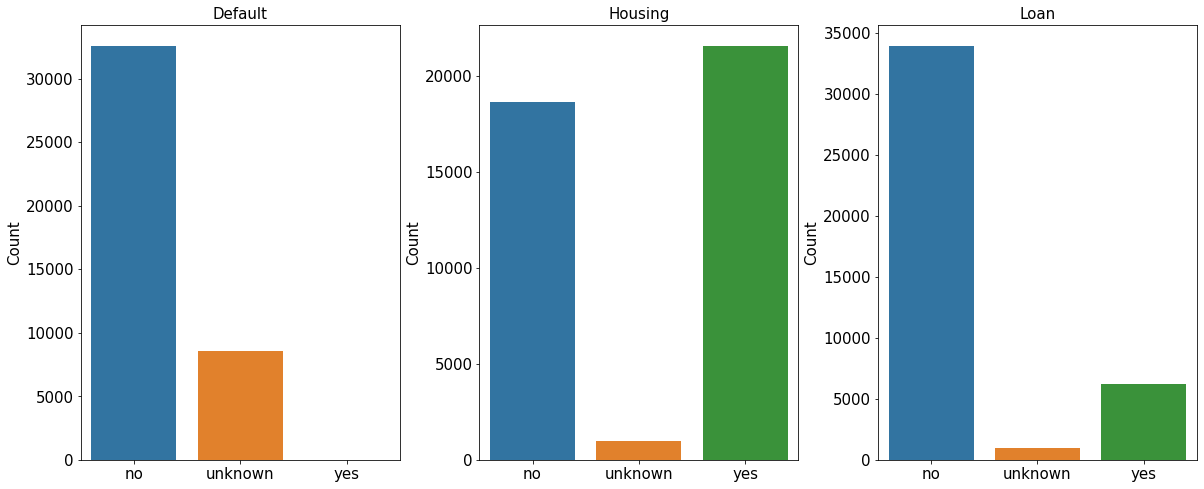

In [ ]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [ ]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [ ]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [ ]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


### Data Pre-processing

In [ ]:
bank_client['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [ ]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,1,1,1,2,2,2
1,3,2,1,2,3,2,2
2,2,2,1,2,2,1,2
3,2,3,1,3,2,2,2
4,3,2,1,2,2,2,1


### Slicing Dataframe

In [ ]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = df.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

### Unique Value in Call Data

In [ ]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


### Call Distribution and Occurence

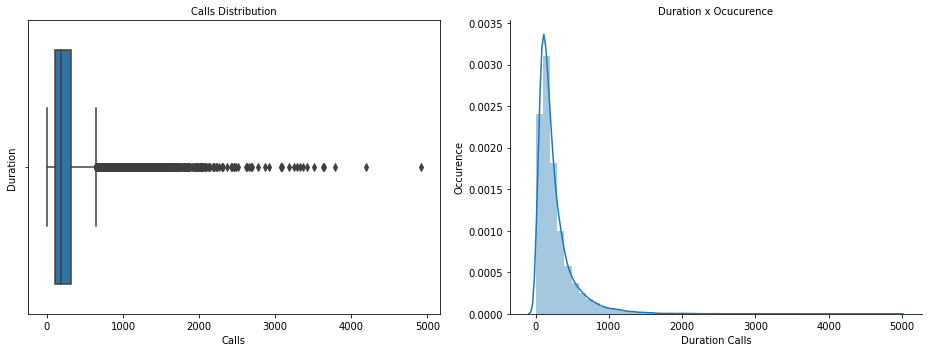

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Descriptive Stat for Call Data

In [ ]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [ ]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


### Outliers for Call Data

In [ ]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


### Date Count Distribution

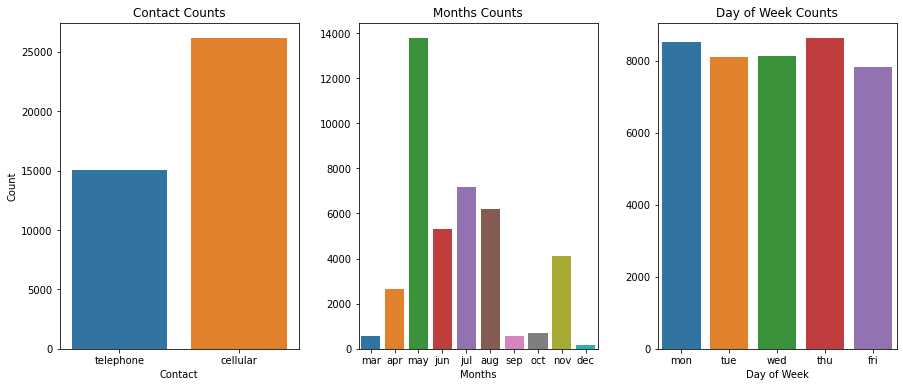

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

### Duration Outliers

In [ ]:
print('Call Duration above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Call Duration above:  644.5 are outliers


In [ ]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

In [ ]:
bank_related['contact'].replace(['telephone', 'cellular'], [1, 2], inplace=True)
bank_related['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
bank_related['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace=True)

In [ ]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,1,1,261
1,1,1,1,149
2,1,1,1,226
3,1,1,1,151
4,1,1,1,307


### Grouping Duration Data

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [ ]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,1,1,3
1,1,1,1,2
2,1,1,1,3
3,1,1,1,2
4,1,1,1,3


### Ungrouping Dataframe

In [ ]:
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

### Post-Processing Dataframe

In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o, df['y']], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome','y']]
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,3,1,1,1,2,2,2,1,1,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
1,3,2,1,2,3,2,2,1,1,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
2,2,2,1,2,2,1,2,1,1,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
3,2,3,1,3,2,2,2,1,1,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no
4,3,2,1,2,2,2,1,1,1,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,no


In [ ]:
bank_final['y'].replace(['no', 'yes'], [0,1], inplace  = True)

In [ ]:
bank_final.shape

(41188, 21)

In [ ]:
bank_final_random = bank_final.sample(frac = 1)

In [ ]:
bank_final_random.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
31460,3,6,1,1,2,1,2,2,1,3,4,-1.8,92.893,-46.2,1.334,5099.1,2,999,1,2,0
36502,1,4,2,2,2,1,2,2,2,3,1,-2.9,92.963,-40.8,1.260,5076.2,2,999,0,1,0
17185,3,5,1,6,3,1,2,2,3,5,2,1.4,93.918,-42.7,4.962,5228.1,1,999,0,1,0
10836,1,2,1,2,2,1,2,1,2,3,4,1.4,94.465,-41.8,4.962,5228.1,2,999,0,1,0
25745,1,4,1,5,2,2,2,2,6,3,4,-0.1,93.200,-42.0,4.120,5195.8,1,999,1,2,0


In [ ]:
bank_final_random.shape

(41188, 21)

## KNN Preparation

### Train and Validation Data

On this KNN Algorithm, We devided 70% Train Data, 20% Validation Data, and 10% Test Data
Used 3 case to train our data. as the picture below : 

![Train.png](attachment:Train.png)

### Upper and Lower Limit

Case 1

In [ ]:
length_train_low = int(bank_final_random.shape[0]*0)
length_train_up = int(bank_final_random.shape[0]*0.7)

length_val_low = int(bank_final_random.shape[0]*0.7)
length_val_up = int(bank_final_random.shape[0]*0.9)

length_test_low = int(bank_final_random.shape[0]*0.9)
length_test_up = int(bank_final_random.shape[0]*1)

print(length_train_low, length_train_up)
print(length_val_low, length_val_up)
print(length_test_low, length_test_up)

0 28831
28831 37069
37069 41188


### Case 2

In [ ]:
#length_train_low = int(bank_final_random.shape[0]*0.3)
#length_train_up = int(bank_final_random.shape[0]*1)

#length_val_low = int(bank_final_random.shape[0]*0.1)
#length_val_up = int(bank_final_random.shape[0]*0.3)

#length_test_low = int(bank_final_random.shape[0]*0)
#length_test_up = int(bank_final_random.shape[0]*0.1)

#print(length_train_low, length_train_up)
#print(length_val_low, length_val_up)
#print(length_test_low, length_test_up)

### Case 3

In [ ]:
#length_train_low = int(bank_final_random.shape[0]*0.1)
#length_train_up = int(bank_final_random.shape[0]*0.8)

#length_val_low = int(bank_final_random.shape[0]*0.8)
#length_val_up = int(bank_final_random.shape[0]*1)

#length_test_low = int(bank_final_random.shape[0]*0)
#length_test_up = int(bank_final_random.shape[0]*0.1)

#print(length_train_low, length_train_up)
#print(length_val_low, length_val_up)
#print(length_test_low, length_test_up)

#### Splitting Data & Rename Column Name

In [ ]:
train_bank_final = bank_final_random.iloc[length_train_low:length_train_up,:]
validate_bank_final = bank_final_random.iloc[length_val_low:length_val_up,:]
test_bank_final = bank_final_random.iloc[length_test_low:length_test_up,:].reset_index().drop(["index"],axis=1)

train_bank_final.rename(columns={'age':'','job':'','marital':'','education':'','default':'','housing':'','loan':'','contact':'','month':'','day_of_week':'','duration':'','emp.var.rate':'','cons.price.idx':'','cons.conf.idx':'','euribor3m':'','nr.employed':'','campaign':'','pdays':'','previous':'','poutcome':'','y':''})
validate_bank_final.rename(columns={'age':'','job':'','marital':'','education':'','default':'','housing':'','loan':'','contact':'','month':'','day_of_week':'','duration':'','emp.var.rate':'','cons.price.idx':'','cons.conf.idx':'','euribor3m':'','nr.employed':'','campaign':'','pdays':'','previous':'','poutcome':'','y':''})
test_bank_final.rename(columns={'age':'','job':'','marital':'','education':'','default':'','housing':'','loan':'','contact':'','month':'','day_of_week':'','duration':'','emp.var.rate':'','cons.price.idx':'','cons.conf.idx':'','euribor3m':'','nr.employed':'','campaign':'','pdays':'','previous':'','poutcome':'','y':''})

,,,,,,,,,,,,,,,,,,,,,
0,1,5,2,2,2,1,2,2,4,4,3,1.4,93.444,-36.1,4.963,5228.1,1,999,0,1,0
1,2,2,1,2,3,1,2,2,4,5,4,1.4,93.444,-36.1,4.966,5228.1,2,999,0,1,0
2,3,5,1,5,3,2,2,1,1,3,3,1.1,93.994,-36.4,4.857,5191.0,4,999,0,1,0
3,2,4,3,1,2,1,2,1,1,3,3,1.1,93.994,-36.4,4.858,5191.0,1,999,0,1,0
4,1,7,2,7,2,1,2,2,6,3,4,-0.1,93.200,-42.0,4.120,5195.8,2,999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,2,5,1,5,2,1,2,2,1,3,1,-1.8,92.893,-46.2,1.281,5099.1,5,999,0,1,0
4115,1,5,2,5,2,2,2,1,2,5,3,1.4,94.465,-41.8,4.959,5228.1,4,999,0,1,0
4116,3,3,2,2,2,2,2,2,3,5,2,1.4,93.918,-42.7,4.962,5228.1,2,999,0,1,0
4117,1,12,2,2,2,2,2,2,10,2,4,-1.1,94.199,-37.5,0.877,4963.6,2,3,1,3,0


In [ ]:
train_bank_final = train_bank_final.astype(float).values.tolist()
validate_bank_final = validate_bank_final.astype(float).values.tolist()
test_bank_final = test_bank_final.astype(float).values.tolist()

#### Create train_set, test_set, and validate_set

In [ ]:
# dictionaries have to keys: 0 for no and 1 for yes
train_set={0:[],1:[]}
test_set={0: [],1:[]}
validate_set={0:[],1: []}
for i in train_bank_final:
  train_set[i[-1]].append(i[:-1]) # appending list to last element
for i in test_bank_final:
  test_set[i[-1]].append(i[:-1])
for i in validate_bank_final:
  validate_set[i[-1]].append(i[:-1])

#### Create KNN Algorithm Function

In [ ]:
def k_nearest_neighbors(data,predict,k):
  distances=[]
  for group in data:
    for features in data[group]:
      euclidean_distance = math.sqrt((features[0]-predict[0])**2 + (features[1]-predict[1])**2)
      distances.append([euclidean_distance, group])
  votes=[i[1] for i in sorted(distances)[:k]]
  vote_result=Counter(votes).most_common(1)[0][0]
  return vote_result

#### Train The Model

In [ ]:
k_range=range(1,5)
correct = 0
total = 0
max_accuracy = 0.0
optimal_k = 0
accuracy = 0.0
accuracies = []
for k in k_range:
  for group in validate_set:
    for data in validate_set[group]:
      vote=k_nearest_neighbors(train_set,data,k)
      if group==vote:
        correct+=1
      total+=1
      accuracy = correct/total
  print("Accuracy with ", k, accuracy)
  if max_accuracy < accuracy:
    max_accuracy = accuracy
    optimal_k = k
  accuracies.append(accuracy)

Accuracy with  1 0.8897790725904345
Accuracy with  2 0.8897790725904345
Accuracy with  3 0.8897386096949098
Accuracy with  4 0.889748725418791


In [ ]:
print('max accuracy: ', max_accuracy)
print('optimal k: ', optimal_k)

max accuracy:  0.8897790725904345
optimal k:  1


#### Test The Model

In [ ]:
# test with test_set and optimal k then find accuracy
for group in test_set:
    for data in test_set[group]:
        vote=k_nearest_neighbors(test_set,data,optimal_k)
        if group==vote:
            correct+=1
        total+=1
        accuracy=correct/total
print('Accuracy: ', accuracy)

Accuracy:  0.8890777157346713
